In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Market_Basket_Optimisation (1).csv', header=None)


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset=[]

In [5]:
with open('Market_Basket_Optimisation (1).csv') as file:
    reader=csv.reader(file,delimiter=',')
    for row in reader:
        dataset.append(row)

In [6]:
dataset[0:10]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries']]

In [7]:
all_item=[]
for row in dataset:
    for item in row:
        all_item.append(item)

In [8]:
df_items=pd.DataFrame(all_item,columns=['item'])

In [9]:
df_items.value_counts()

item         
mineral water    1788
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Name: count, Length: 120, dtype: int64

<Axes: xlabel='count', ylabel='item'>

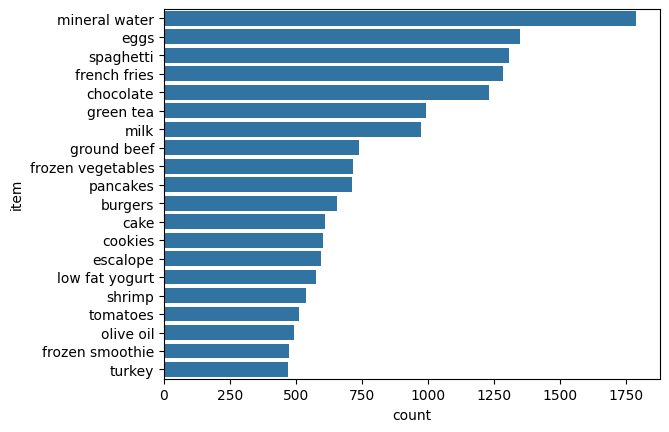

In [10]:
sns.countplot(y=df_items['item'],order=df_items['item'].value_counts().index[:20])

In [11]:
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [12]:
te=TransactionEncoder()
x=te.fit_transform(dataset)



In [13]:
x

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]], shape=(7501, 120))

In [14]:
len(te.columns_)

120

In [15]:
df_final=pd.DataFrame(x,columns=te.columns_)

In [16]:
df_final.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [17]:
freq_items=apriori(df_final,min_support=0.01,use_colnames=True)

In [18]:
freq_items

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, ground beef, milk)"
253,0.017064,"(spaghetti, mineral water, ground beef)"
254,0.015731,"(spaghetti, mineral water, milk)"
255,0.010265,"(spaghetti, mineral water, olive oil)"


In [26]:
rules=association_rules(freq_items,metric='confidence',min_threshold=0.1)

In [27]:
rules=rules[['antecedents','consequents','support','confidence','lift']]

In [28]:
rules

,antecedents,consequents,support,confidence,lift
0,(avocado),(mineral water),0.011598,0.348000,1.459926
1,(burgers),(cake),0.011465,0.131498,1.622319
2,(cake),(burgers),0.011465,0.141447,1.622319
3,(burgers),(chocolate),0.017064,0.195719,1.194537
4,(chocolate),(burgers),0.017064,0.104150,1.194537
...,...,...,...,...,...
315,(olive oil),"(spaghetti, mineral water)",0.010265,0.155870,2.609786
316,"(spaghetti, mineral water)",(pancakes),0.011465,0.191964,2.019529
317,"(spaghetti, pancakes)",(mineral water),0.011465,0.455026,1.908923
318,"(mineral water, pancakes)",(spaghetti),0.011465,0.339921,1.952333


In [29]:
freq_items2=apriori(df_final,min_support=0.05,use_colnames=True)
rules2=association_rules(freq_items,metric='lift',min_threshold=0.1)
rules2=rules[['antecedents','consequents','support','confidence','lift']]
rules2

,antecedents,consequents,support,confidence,lift
0,(avocado),(mineral water),0.011598,0.348000,1.459926
1,(burgers),(cake),0.011465,0.131498,1.622319
2,(cake),(burgers),0.011465,0.141447,1.622319
3,(burgers),(chocolate),0.017064,0.195719,1.194537
4,(chocolate),(burgers),0.017064,0.104150,1.194537
...,...,...,...,...,...
315,(olive oil),"(spaghetti, mineral water)",0.010265,0.155870,2.609786
316,"(spaghetti, mineral water)",(pancakes),0.011465,0.191964,2.019529
317,"(spaghetti, pancakes)",(mineral water),0.011465,0.455026,1.908923
318,"(mineral water, pancakes)",(spaghetti),0.011465,0.339921,1.952333
